## Questions we hope to answer with our Rotten Tomatoes Movies dataset:

1. Which genre(s) have the highest average Tomatometer ratings?
2. What is the relationship between Tomatometer ratings and Audience ratings?
3. Which directors have the highest average Tomatometer scores?
4. How do Tomatometer ratings compare between different studios?
5. What is the trend of average Tomatometer ratings over time?

## Loading the Data.

In [1]:
import pandas as pd  # Import the pandas library to handle data

# Loading the dataset from the CSV file into a DataFrame
rt = pd.read_csv('Rotten Tomatoes Movies.csv')

# Displaying the first few rows to understand what the data looks like
rt.head()  # head() shows the first 5 rows of the data

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


## Exploring the Data.

In [2]:
# Checking for missing values and getting an overview of the data types in each column

rt.info()

#NB: .info() gives a summary of the DataFrame including data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

### Given the questions we want to answer, we will perform specific cleaning procedures. 

#### Handling Missing Values
The priority is to determine if missing values need to be filled, dropped, or kept as-is.

**Categorise columns based on relevance:**

* Important columns: movie_title, tomatometer_rating, tomatometer_count, audience_rating, genre, audience_count.
* Optional/less critical columns: critics_consensus, writers, studio_name.


For critical columns (like movie_title, tomatometer_rating): Check if any rows have missing values, and drop those rows:

In [3]:
rt[['movie_title', 'in_theaters_date', 'tomatometer_rating', 'rating', 'runtime_in_minutes', 'studio_name', 'tomatometer_status', 'tomatometer_count', 'audience_rating', 'audience_count', 'on_streaming_date']].isna().sum()

movie_title             0
in_theaters_date      815
tomatometer_rating      0
rating                  0
runtime_in_minutes    155
studio_name           416
tomatometer_status      0
tomatometer_count       0
audience_rating       252
audience_count        252
on_streaming_date       2
dtype: int64

#### From the above, we notice that `in_theaters_date` has 815 missing values, `runtime_in_minutes` has 155, `studio_name` has 416, `on_streaming_date` has 2, while `audience_rating` and `audience_count` both have 252 missing values respectively.

Our next approach will be to handle these missing values.

#### Here are the essential(i.e Critical) columns needed to answer all 5 questions:

1. `genre`
2. `studio_name`
3. `runtime_in_minutes`
4. `tomatometer_status`
5. `tomatometer_rating`
6. `audience_rating`
7. `tomatometer_count`
8. `audience_count`
9. `in_theaters_date`

#### Next, we will deal with the `run_time_in_minutes` column. Since it is critical, we may need to conduct research to find out the duration of each of these movies.

In [7]:
null_runtime_rows = rt[rt['runtime_in_minutes'].isna()]
null_runtime_rows

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
215,Prima Ballerina,In the grand tradition of the Ballet Russes co...,A straightforward documentary about five Russi...,NR,"Art House & International, Special Interest",Laurent Gentot,Bertrand Normand,"Svetlana Zakharova, Ulyana Lopatkina",2009-01-16,2009-12-08,NaN,First Run Features,Fresh,81,26,100.0,24.0
1818,12 Strong,"Chris Hemsworth (""Thor,"" ""The Avengers"" films)...","12 Strong has a solid cast, honorable intentio...",R,"Action & Adventure, Drama",Nicolai Fuglsig,"Peter Craig, Ted Tally","Chris Hemsworth, Michael Shannon, Michael Peña...",2018-01-19,2018-05-01,NaN,Warner Bros. Pictures,Rotten,51,166,62.0,5067.0
2007,A Bad Moms Christmas,A BAD MOMS CHRISTMAS follows our three under-a...,Featuring twice the moms but roughly half the ...,R,Comedy,Jon Lucas,Jon Lucas,"Mila Kunis, Kristen Bell, Kathryn Hahn, Jay He...",2017-11-01,2018-02-06,NaN,STXfilms,Rotten,31,127,44.0,13153.0
2056,A Futile and Stupid Gesture,The rise and fall of humor magazine National L...,A Futile and Stupid Gesture entertainingly rec...,NR,Comedy,David Wain,"Michael Colton, John Aboud","Will Forte, Domhnall Gleeson, Emmy Rossum, Mat...",NaN,2018-01-26,NaN,Netflix,Fresh,67,43,72.0,516.0
2216,Accident Man,A cold-blooded killer called the Accident Man ...,NaN,R,"Action & Adventure, Mystery & Suspense",Jesse V. Johnson,"Scott Adkins, Stu Small","Scott Adkins, Ray Stevenson, Michael Jai White...",NaN,2018-02-06,NaN,Six Demon Films,Fresh,100,5,68.0,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15870,Victoria & Abdul,The extraordinary true story of an unexpected ...,Victoria & Abdul reunites Dame Judi Dench with...,PG-13,Drama,Stephen Frears,Lee Hall,"Judi Dench, Ali Fazal, Eddie Izzard, Adeel Akh...",2017-10-06,2017-12-19,NaN,Focus Features,Fresh,66,192,67.0,9487.0
15995,War Machine,Brad Pitt and Anthony Michael Hall star in thi...,War Machine's uneven execution keeps its fact-...,NR,"Action & Adventure, Comedy",David Michôd,David Michôd,"Brad Pitt, Tilda Swinton, Ben Kingsley, Anthon...",2017-05-26,2017-05-26,NaN,Netflix,Rotten,48,91,34.0,5443.0
16230,White Fang (Croc-Blanc),"Set in Yukon, Canada during the 1890's Klondik...",NaN,NR,"Action & Adventure, Animation",Alexandre Espigares,"Dominique Monfery, Philippe Lioret, Serge Frydman","Rashida Jones, Nick Offerman, Paul Giamatti",NaN,2018-07-06,NaN,Netflix,Fresh,80,10,75.0,171.0
16347,Winchester,Inspired by true events. On an isolated stretc...,Like a grand staircase within the famous mansi...,PG-13,"Drama, Mystery & Suspense, Science Fiction & F...","Michael Spierig, Peter Spierig","Michael Spierig, Peter Spierig, Tom Vaughan","Helen Mirren, Jason Clarke, Sarah Snook, Angus...",2018-02-02,2018-05-01,NaN,CBS Films,Rotten,14,124,32.0,2708.0


In [8]:
null_runtime_rows[['movie_title', 'directors', 'runtime_in_minutes']]

,movie_title,directors,runtime_in_minutes
215,Prima Ballerina,Laurent Gentot,NaN
1818,12 Strong,Nicolai Fuglsig,NaN
2007,A Bad Moms Christmas,Jon Lucas,NaN
2056,A Futile and Stupid Gesture,David Wain,NaN
2216,Accident Man,Jesse V. Johnson,NaN
...,...,...,...
15870,Victoria & Abdul,Stephen Frears,NaN
15995,War Machine,David Michôd,NaN
16230,White Fang (Croc-Blanc),Alexandre Espigares,NaN
16347,Winchester,"Michael Spierig, Peter Spierig",NaN


In [9]:
# # Saving the filtered df as a .csv file for further research to find out the duration of each movie.
# null_runtime_rows_research = null_runtime_rows[['movie_title', 'directors', 'runtime_in_minutes']]

# # Save to a CSV file
# null_runtime_rows_research.to_csv('null_runtime_rows_research.csv', index=False)

# print("Filtered data has been saved to 'null_runtime_rows_research.csv'")


In [10]:
rt[rt['runtime_in_minutes'].isna() & rt['directors'].isna()]

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
5818,"Everything, Everything",A teenage girl (Amandla Stenberg) is unable to...,"Everything, Everything should tug young adult ...",PG-13,"Drama, Romance",NaN,J. Mills Goodloe,"Amandla Stenberg, Nick Robinson, Anika Noni Ro...",2017-05-19,2017-08-15,NaN,Warner Bros. Pictures,Rotten,45,117,62.0,9477.0
6806,Goodbye Christopher Robin,GOODBYE CHRISTOPHER ROBIN gives a rare glimpse...,Goodbye Christopher Robin struggles to balance...,PG,Drama,NaN,"Simon Vaughan, Frank Cottrell Boyce","Domhnall Gleeson, Margot Robbie, Kelly Macdona...",2017-10-13,2018-01-23,NaN,Fox Searchlight Pictures,Fresh,63,173,71.0,7023.0
11609,"Ray Romano: Right Here, Around the Corner","23 years after his last stand-up special, come...",NaN,NR,Comedy,NaN,Ray Romano,Ray Romano,NaN,2019-02-05,NaN,Netflix,Rotten,57,7,NaN,NaN
11642,Recovery Boys,"In the heart of America's opioid epidemic, fou...",NaN,NR,Documentary,NaN,NaN,NaN,2018-06-29,2018-06-29,NaN,NaN,Fresh,100,11,81.0,140.0


### To handle the missing values in some of our columns, we have to conduct some research.

#### Our first stop will be the `run_time_in_minutes` column.
* Having completed the research and filling the missing runtime, we will import the Updated Runtime CSV File by first loading the CSV file into a new DataFrame so we can merge the runtime data back into our main DataFrame.

In [11]:
# Loading the runtime corrections CSV
updated_runtime = pd.read_csv('null_runtime_rows_updated.csv')

# Checking the head of the DataFrame to ensure it's loaded correctly
updated_runtime.head()


,movie_title,directors,runtime_in_minutes
0,Prima Ballerina,Laurent Gentot,52
1,12 Strong,Nicolai Fuglsig,129
2,A Bad Moms Christmas,Jon Lucas,104
3,A Futile and Stupid Gesture,David Wain,101
4,Accident Man,Jesse V. Johnson,105


#### Next, we'll merge the New Runtime Information using the merge() function to bring the new `runtime_in_minutes` data into the original DataFrame.

In [12]:
# Merging the updated runtime values into the main DataFrame
rt = rt.merge(updated_runtime[['movie_title', 'runtime_in_minutes']], 
              on='movie_title', 
              how='left', 
              suffixes=('', '_updated'))

# Check the result to verify the merged values
rt[['movie_title', 'runtime_in_minutes', 'runtime_in_minutes_updated']].head()


,movie_title,runtime_in_minutes,runtime_in_minutes_updated
0,Percy Jackson & the Olympians: The Lightning T...,83.0,NaN
1,Please Give,90.0,NaN
2,10,118.0,NaN
3,12 Angry Men (Twelve Angry Men),95.0,NaN
4,"20,000 Leagues Under The Sea",127.0,NaN


#### Then we replace Missing Values with Updated Data by replacing the null values in the runtime_in_minutes column with the values from runtime_in_minutes_updated

In [13]:
# Filling missing runtime values with updated ones
rt['runtime_in_minutes'] = rt['runtime_in_minutes'].fillna(rt['runtime_in_minutes_updated'])

# Dropping the temporary column created during the merge
rt.drop('runtime_in_minutes_updated', axis=1, inplace=True)

# Verify if the missing values are resolved
rt['runtime_in_minutes'].isna().sum()


0

In [14]:
rt[['genre', 'movie_title', 'tomatometer_rating', 'rating', 'runtime_in_minutes', 'studio_name', 'tomatometer_status', 'tomatometer_count', 'audience_rating', 'audience_count']].isna().sum()

genre                  17
movie_title             0
tomatometer_rating      0
rating                  0
runtime_in_minutes      0
studio_name           416
tomatometer_status      0
tomatometer_count       0
audience_rating       252
audience_count        252
dtype: int64

#### From the above, we can see that our `runtime_in_minutes` column has no NaN values.

#### Our next stop will be the `genre` column.

In [15]:
null_genre_rows = rt[rt['genre'].isna()]
null_genre_rows

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
1927,400 Days,This psychological sci-fi film centers on four...,NaN,PG-13,NaN,Matt Osterman,Matt Osterman,"Brandon Routh, Caity Lotz, Ben Feldman, Dane C...",2016-01-15,2016-05-03,91.0,New Artists Alliance,Rotten,22,9,41.0,2108.0
2449,All the Way,Adaptation of Robert Schenkkan's Tony Award-wi...,Anchored by Bryan Cranston's phenomenal perfor...,NR,NaN,Jay Roach,Robert Schenkkan,"Bryan Cranston, Anthony Mackie, Bradley Whitfo...",2016-05-21,2016-09-06,132.0,Amblin Television,Certified Fresh,88,33,83.0,2822.0
3088,Batman: Hush,A mysterious stalker attempts to sabotage Batm...,NaN,PG-13,NaN,Justin Copeland,"Jeph Loeb, Jim Lee","Jason O'Mara, Bruce Thomas, Rebecca Romijn, Pe...",NaN,2019-07-20,81.0,NaN,Fresh,88,17,67.0,6.0
3091,Batman: Return Of The Caped Crusaders,It's back to the 1960s as Batman and Robin spr...,Adam West's groovy interpretation of the The C...,PG,NaN,Rick Morales,"William Dozier, Bill Finger, Michael Jelenic, ...","Steven Weber, Adam West, Burt Ward, Julie Newm...",NaN,2016-11-01,72.0,Warner Bros. Animation,Fresh,94,18,67.0,474.0
3100,Batman vs. Two-Face,A former Gotham D.A. goes on an evil rampage i...,NaN,PG,NaN,Rick Morales,"Michael Jelenic, James Tucker","Adam West, Burt Ward, William Shatner, Julie N...",NaN,2017-10-17,72.0,DC Entertainment,Fresh,100,8,60.0,174.0
4751,Cross of Iron,A quote from Bertolt Brecht ends this bitter a...,NaN,R,NaN,Sam Peckinpah,"Walter Kelley, Julius J. Epstein, Charlie Hami...","James Coburn, Maximilian Schell, James Mason, ...",1977-01-01,2000-02-01,130.0,AVCO Embassy Pictures,Fresh,75,16,87.0,7535.0
5125,Descendants 2,Mal returns to the Isle of the Lost where her ...,NaN,NR,NaN,Kenny Ortega,NaN,"Sofia Carson, Booboo Stewart, Cameron Boyce, M...",NaN,2017-08-15,30.0,NaN,Fresh,67,6,72.0,832.0
8121,Jane Wants a Boyfriend,A young woman with Asperger syndrome begins a ...,NaN,R,NaN,William Sullivan,Jarret Kerr,"Louisa Krause, Eliza Dushku, Amir Arison, Gabr...",2016-03-25,2016-08-30,101.0,Copperline Creative,Rotten,29,7,63.0,234.0
8359,Justice League vs the Fatal Five,The Justice League faces a powerful new threat...,NaN,PG-13,NaN,Sam Liu,NaN,"Elyes Gabel, Diane Guerrero, Tara Strong, Noel...",NaN,2019-04-16,87.0,Warner Bros,Fresh,100,8,65.0,40.0
9197,Lost in the Sun,"The story of John, a small time crook, who fin...",NaN,NR,NaN,Trey Nelson,Trey Nelson,"Josh Duhamel, Josh Wiggins, Lynn Collins, Emma...",2015-11-06,2015-12-01,95.0,Floren Shieh Productions,Rotten,20,10,37.0,266.0


In [16]:
null_genre_rows[['movie_title', 'directors', 'genre']]

,movie_title,directors,genre
1927,400 Days,Matt Osterman,NaN
2449,All the Way,Jay Roach,NaN
3088,Batman: Hush,Justin Copeland,NaN
3091,Batman: Return Of The Caped Crusaders,Rick Morales,NaN
3100,Batman vs. Two-Face,Rick Morales,NaN
4751,Cross of Iron,Sam Peckinpah,NaN
5125,Descendants 2,Kenny Ortega,NaN
8121,Jane Wants a Boyfriend,William Sullivan,NaN
8359,Justice League vs the Fatal Five,Sam Liu,NaN
9197,Lost in the Sun,Trey Nelson,NaN


In [17]:
# # Saving the filtered df as a .csv file for further research to find out the genre of each movie.
# null_genre_rows_research = null_genre_rows[['movie_title', 'directors', 'genre']]

# # Save to a CSV file
# null_genre_rows_research.to_csv('null_genre_rows_research.csv', index=False)

# print("Filtered data has been saved to 'null_genre_rows_research.csv'")


#### To handle null values in our `genre` column, we are going to try another approach. This is the use of a movies database's API. API Integration is the use of an API like the IMDb or TMDb API to fetch movies' information, and in this case, genres in bulk.

In [18]:
import requests
import time

# Your TMDb API key
API_KEY = 'a56ee1fcc3dafbef4b9a9dc3e500cf25'

# Base URLs for TMDb API
SEARCH_URL = "https://api.themoviedb.org/3/search/movie"
MOVIE_DETAILS_URL = "https://api.themoviedb.org/3/movie"

# Loading our DataFrame with missing genres
missing_genre_movies = rt[rt['genre'].isna()]

# Define a function to fetch genre using TMDb API
def fetch_genre(movie_title):
    """
    This function fetches the genre(s) for a movie using the TMDb API.

    Args:
        movie_title (str): The title of the movie for which to fetch genres.

    Returns:
        str: A string of genres separated by commas (e.g., "Action, Comedy"),
             or None if genres cannot be fetched or the movie is not found.

    Workflow:
        1. Use TMDb's "search/movie" endpoint to find the movie based on its title.
        2. If the movie is found, retrieve its movie ID.
        3. Use the "movie/{movie_id}" endpoint to fetch detailed information, 
           including its genre(s).
        4. Return the genre(s) as a comma-separated string or None if unavailable.
    """
    try:
        # Step 1: Search for the movie
        params = {
            'api_key': API_KEY,
            'query': movie_title,
        }
        response = requests.get(SEARCH_URL, params=params)
        response_data = response.json()
        
        # If no results, return None
        if not response_data['results']:
            return None
        
        # Step 2: Get the first movie's ID
        movie_id = response_data['results'][0]['id']
        
        # Step 3: Fetch movie details by ID
        movie_response = requests.get(f"{MOVIE_DETAILS_URL}/{movie_id}", params={'api_key': API_KEY})
        movie_data = movie_response.json()
        
        # Extract genres
        genres = [genre['name'] for genre in movie_data.get('genres', [])]
        return ", ".join(genres) if genres else None
    except Exception as e:
        print(f"Error fetching genre for {movie_title}: {e}")
        return None

# Apply the function to movies with missing genres
genres = []
for title in missing_genre_movies['movie_title']:
    print(f"Fetching genre for: {title}")
    genres.append(fetch_genre(title))
    time.sleep(1)  # Add delay to respect API rate limits

# Assign the genres back to the DataFrame
missing_genre_movies['genre'] = genres

# Update the original DataFrame with the fetched genres
rt.update(missing_genre_movies)

# Check the updated DataFrame
rt.head()

# # Optionally save the updated DataFrame
# rt.to_csv('rt_updated_with_genres.csv', index=False)


Fetching genre for: 400 Days
Fetching genre for: All the Way
Fetching genre for: Batman: Hush
Fetching genre for: Batman: Return Of The Caped Crusaders
Fetching genre for: Batman vs. Two-Face
Fetching genre for: Cross of Iron
Fetching genre for: Descendants 2
Fetching genre for: Jane Wants a Boyfriend
Fetching genre for: Justice League vs the Fatal Five
Fetching genre for: Lost in the Sun
Fetching genre for: Manson Family Vacation
Fetching genre for: Pokémon The Movie: I Choose You!
Fetching genre for: Suicide Squad: Hell to Pay
Fetching genre for: The Death of Superman
Fetching genre for: The Debt Collector
Fetching genre for: The Jurassic Games
Fetching genre for: Wonder Woman: Bloodlines


C:\Users\USER\AppData\Local\Temp\ipykernel_18688\4258344125.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_genre_movies['genre'] = genres


,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [19]:
rt[['genre', 'movie_title', 'tomatometer_rating', 'rating', 'runtime_in_minutes', 'studio_name', 'tomatometer_status', 'tomatometer_count', 'audience_rating', 'audience_count']].isna().sum()

genre                   0
movie_title             0
tomatometer_rating      0
rating                  0
runtime_in_minutes      0
studio_name           416
tomatometer_status      0
tomatometer_count       0
audience_rating       252
audience_count        252
dtype: int64

In [20]:
rt[rt["movie_title"] == "Batman: Return Of The Caped Crusaders"]

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
3091,Batman: Return Of The Caped Crusaders,It's back to the 1960s as Batman and Robin spr...,Adam West's groovy interpretation of the The C...,PG,"Action, Animation, Adventure, Crime, Science F...",Rick Morales,"William Dozier, Bill Finger, Michael Jelenic, ...","Steven Weber, Adam West, Burt Ward, Julie Newm...",NaN,2016-11-01,72.0,Warner Bros. Animation,Fresh,94,18,67.0,474.0


### API Integration for such task is way more efficient and saves time. 

#### Upnext will be the `studio_name` column.
* We will implement the same API integration as it is a faster approach.

In [21]:
null_studio_rows = rt[rt['studio_name'].isna()]
null_studio_rows

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
27,A Tale of Two Pizzas,Two warring families are brought together by l...,NaN,PG,Comedy,Vincent Sassone,Vincent Sassone,"Vincent Pastore, Vincent Sassone, Frank Vincen...",2003-11-07,2007-06-26,82.0,NaN,Rotten,38,8,NaN,NaN
66,Gui si (Silk),The ghost of a young boy haunts a Taipei apart...,NaN,PG-13,"Art House & International, Horror, Mystery & S...",Chao-Bin Su,NaN,"Chen Chang, Yosuke Eguchi, Kar Yan Lam, Barbie...",2006-05-24,2007-06-12,117.0,NaN,Rotten,40,5,58.0,2530.0
68,The 4th Dimension,"Though born a prodigy, with a frighteningly in...",NaN,NR,"Drama, Science Fiction & Fantasy","Tom Mattera, Dave Mazzoni","Tom Mattera, Dave Mazzoni","Louis Morabito, Miles Williams, Karen Peakes, ...",2006-04-01,2008-04-08,82.0,NaN,Fresh,63,8,31.0,394.0
71,The Silence,A cop haunted by an accidental killing begins ...,NaN,R,"Action & Adventure, Drama, Mystery & Suspense,...",Cate Shortland,NaN,"Richard Roxburgh, Essie Davis, Alice McConnell...",NaN,2009-08-25,104.0,NaN,Rotten,50,6,38.0,374.0
135,Guta-yubalja-deul (A Bloody Aria),An aspiring opera singer takes a trip into the...,"Pulpy, bloody and violent, this Korean shock-f...",NR,"Art House & International, Drama, Mystery & Su...",Shin-yeon Won,NaN,"Han Suk-kyu, Oh Dal-su, Mun-shik Lee, Cha Ye-R...",2006-05-31,2008-02-26,115.0,NaN,Rotten,42,24,40.0,297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16440,Wonderwall,Oscar Collins (Jack MacGowran) is a professor ...,NaN,NR,"Musical & Performing Arts, Romance",Joe Massot,G. Cabrera Infante,"Jack MacGowran, Jane Birkin, Irene Handl, Rich...",1969-01-01,2004-08-10,82.0,NaN,Fresh,80,5,40.0,524.0
16474,Wrecker,Best friends Emily and Lesley go on a road tri...,NaN,NR,Horror,Micheal Bafaro,"Evan Tylor, Micheal Bafaro","Anna Hutchison, Andrea Whitburn, Jennifer Koen...",2015-11-06,2016-01-05,83.0,NaN,Rotten,0,6,13.0,165.0
16476,Wrinkles the Clown,It started with a silent black and white surve...,NaN,NR,"Comedy, Documentary, Horror",Michael Beach Nichols,Christopher K. Walker,NaN,2019-10-04,2019-10-04,78.0,NaN,Fresh,67,27,NaN,NaN
16516,The Year My Voice Broke,The life of a teen in an isolated small town i...,NaN,PG-13,"Drama, Romance",John Duigan,John Duigan,"Noah Taylor, Loene Carmen, Leone Carmen, Ben M...",1987-10-17,2000-02-08,103.0,NaN,Fresh,94,16,84.0,889.0


In [22]:
null_studio_rows[['movie_title', 'directors', 'studio_name']]

,movie_title,directors,studio_name
27,A Tale of Two Pizzas,Vincent Sassone,NaN
66,Gui si (Silk),Chao-Bin Su,NaN
68,The 4th Dimension,"Tom Mattera, Dave Mazzoni",NaN
71,The Silence,Cate Shortland,NaN
135,Guta-yubalja-deul (A Bloody Aria),Shin-yeon Won,NaN
...,...,...,...
16440,Wonderwall,Joe Massot,NaN
16474,Wrecker,Micheal Bafaro,NaN
16476,Wrinkles the Clown,Michael Beach Nichols,NaN
16516,The Year My Voice Broke,John Duigan,NaN


In [23]:
# # Saving the filtered df as a .csv file for reference purpose if needed.
# null_studio_rows_ref = null_studio_rows[['movie_title', 'directors', 'studio_name']]

# # Save to a CSV file
# null_studio_rows_ref.to_csv('null_studio_rows_ref.csv', index=False)

# print("Filtered data has been saved to 'null_studio_rows_ref.csv'")

In [24]:
# Our TMDb API key
API_KEY = 'a56ee1fcc3dafbef4b9a9dc3e500cf25'

# Base URLs for TMDb API
SEARCH_URL = "https://api.themoviedb.org/3/search/movie"
MOVIE_DETAILS_URL = "https://api.themoviedb.org/3/movie"

# Load your DataFrame with missing studio names
missing_studio_movies = rt[rt['studio_name'].isna()]

def fetch_studio(movie_title):
    """
    Fetches the production company (studio name) for a movie using the TMDb API.

    Args:
        movie_title (str): The title of the movie for which to fetch the studio name.

    Returns:
        str: The name of the primary production company,
             or None if the studio cannot be fetched or the movie is not found.

    Workflow:
        1. Use TMDb's "search/movie" endpoint to find the movie based on its title.
        2. If the movie is found, retrieve its movie ID.
        3. Use the "movie/{movie_id}" endpoint to fetch detailed information,
           including its production companies.
        4. Return the name of the first production company or None if unavailable.
    """
    try:
        # Step 1: Search for the movie
        params = {
            'api_key': API_KEY,
            'query': movie_title,
        }
        response = requests.get(SEARCH_URL, params=params)
        response_data = response.json()
        
        # If no results, return None
        if not response_data['results']:
            return None
        
        # Step 2: Get the first movie's ID
        movie_id = response_data['results'][0]['id']
        
        # Step 3: Fetch movie details by ID
        movie_response = requests.get(f"{MOVIE_DETAILS_URL}/{movie_id}", params={'api_key': API_KEY})
        movie_data = movie_response.json()
        
        # Extract production companies
        production_companies = movie_data.get('production_companies', [])
        if production_companies:
            # Return the first production company's name
            return production_companies[0].get('name', None)
        return None
    except Exception as e:
        print(f"Error fetching studio name for {movie_title}: {e}")
        return None

# Apply the function to movies with missing studio names
studios = []
for title in missing_studio_movies['movie_title']:
    print(f"Fetching studio name for: {title}")
    studios.append(fetch_studio(title))
    time.sleep(1)  # Add delay to respect API rate limits

# Assign the studio names back to the DataFrame
missing_studio_movies['studio_name'] = studios

# Update the original DataFrame with the fetched studio names
rt.update(missing_studio_movies)

# Check the updated DataFrame
rt.head()

# # Optionally save the updated DataFrame
# rt.to_csv('rt_updated_with_studio_names.csv', index=False)

Fetching studio name for: A Tale of Two Pizzas
Fetching studio name for: Gui si (Silk)
Fetching studio name for: The 4th Dimension
Fetching studio name for: The Silence
Fetching studio name for: Guta-yubalja-deul (A Bloody Aria)
Fetching studio name for: Big Business
Fetching studio name for: The Silent Partner
Fetching studio name for: Shivers (They Came from Within) (The Parasite Murders)
Fetching studio name for: Frankenstein
Fetching studio name for: Savage Messiah
Fetching studio name for: Betty
Fetching studio name for: Robin Hood
Fetching studio name for: Passion (Godard's Passion)
Fetching studio name for: Fireworks (Hana-bi)
Fetching studio name for: Inferno (Pilgrim)
Fetching studio name for: La Ciudad (The City)
Fetching studio name for: Uprising
Fetching studio name for: Late Night Shopping
Fetching studio name for: Union Square
Fetching studio name for: The Muppets' Wizard of Oz
Fetching studio name for: Bad Timing
Fetching studio name for: Stupidity
Fetching studio name f

Fetching studio name for: Jim Gaffigan: Obsessed
Fetching studio name for: Johnny Frank Garrett's Last Word
Fetching studio name for: The Joy of Life
Fetching studio name for: Men at Work
Fetching studio name for: Killing Gunther
Fetching studio name for: King Charles III
Fetching studio name for: King Charles III
Fetching studio name for: Kolobos
Fetching studio name for: Kyun...! Ho Gaya Na
Fetching studio name for: La Chinoise
Fetching studio name for: The Lady in the Car with Glasses and a Gun (La dame dans l'auto avec un fusil et des lunettes)
Fetching studio name for: La Sierra
Fetching studio name for: Lamb
Fetching studio name for: Last Shift
Fetching studio name for: Le Deuxième souffle (Second Breath)
Fetching studio name for: Le Jour se lève (Daybreak)
Fetching studio name for: Legend of the Mountain
Fetching studio name for: Liam Gallagher: As It Was
Fetching studio name for: Liberty Kid
Fetching studio name for: The Lickerish Quartet
Fetching studio name for: Lightning Ove

Fetching studio name for: The Forgotten Kingdom
Fetching studio name for: The Go-Getters
Fetching studio name for: The Hatton Garden Job
Fetching studio name for: The Holiday Calendar
Fetching studio name for: The Horror of H.P. Lovecraft (LovecraCked! The Movie)
Fetching studio name for: The Houses October Built 2
Fetching studio name for: The Last Sharknado: It's About Time
Fetching studio name for: The Little Vampire 3D
Fetching studio name for: The Lovers And The Despot
Fetching studio name for: The Mask You Live In
Fetching studio name for: The Most Dangerous Year
Fetching studio name for: The Neighbor
Fetching studio name for: The Other Side of Everything (Druga strana svega)
Fetching studio name for: The Other Side of the Door
Fetching studio name for: The Parts You Lose
Fetching studio name for: The Passion of Anna (En Passion)
Fetching studio name for: The Princess Switch
Fetching studio name for: The Quake (Skjelvet)
Fetching studio name for: The Quiet Family (Choyonghan kajo

C:\Users\USER\AppData\Local\Temp\ipykernel_18688\2168538689.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_studio_movies['studio_name'] = studios


,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [25]:
rt[['genre', 'movie_title', 'tomatometer_rating', 'rating', 'runtime_in_minutes', 'studio_name', 'tomatometer_status', 'tomatometer_count', 'audience_rating', 'audience_count']].isna().sum()

genre                   0
movie_title             0
tomatometer_rating      0
rating                  0
runtime_in_minutes      0
studio_name           100
tomatometer_status      0
tomatometer_count       0
audience_rating       252
audience_count        252
dtype: int64

In [26]:
# new_null_studio_rows = rt[rt['studio_name'].isna()]

# new_null_studio_rows = new_null_studio_rows[['movie_title', 'directors', 'studio_name']]
# new_null_studio_rows_ref = new_null_studio_rows[['movie_title', 'directors', 'studio_name']]
# new_null_studio_rows_ref

In [27]:
# # Apply the function to movies with missing studio names
# studios = []
# for title in new_null_studio_rows_ref['movie_title']:
#     print(f"Fetching studio name for: {title}")
#     studios.append(fetch_studio(title))
#     time.sleep(1)  # Add delay to respect API rate limits

# # Assign the studio names back to the DataFrame
# new_null_studio_rows_ref['studio_name'] = studios

# # Update the original DataFrame with the fetched studio names
# new_null_studio_rows_ref.update(new_null_studio_rows_ref)

# # Check the updated DataFrame
# new_null_studio_rows_ref.head()

# # # Optionally save the updated DataFrame
# # rt.to_csv('rt_updated_with_studio_names.csv', index=False)

In [28]:
# new_null_studio_rows_ref

In [29]:
rt[['genre', 'movie_title', 'tomatometer_rating', 'rating', 'runtime_in_minutes', 'studio_name', 'tomatometer_status', 'tomatometer_count', 'audience_rating', 'audience_count']].isna().sum()

genre                   0
movie_title             0
tomatometer_rating      0
rating                  0
runtime_in_minutes      0
studio_name           100
tomatometer_status      0
tomatometer_count       0
audience_rating       252
audience_count        252
dtype: int64

#### Since we were unable to fetch 100 of the 416 NaN studio_name values through the TMDB API, we may consider dropping these rows as they only make up about 0.6% of the entire rows in the `rt` dataframe.
* However, let's see if we can try another method. We will try using an inbuilt Python library for retrieving data from the Internet Movie Database (IMDb).

In [30]:
# pip install imdbpy

In [31]:
new_null_studio_rows = rt[rt['studio_name'].isna()]

new_null_studio_rows = new_null_studio_rows[['movie_title', 'directors', 'studio_name']]
new_null_studio_rows_ref = new_null_studio_rows[['movie_title', 'directors', 'studio_name']]
new_null_studio_rows_ref

,movie_title,directors,studio_name
68,The 4th Dimension,"Tom Mattera, Dave Mazzoni",NaN
1507,Stupidity,Albert Nerenberg,NaN
1564,Dear Pillow,Bryan Poyser,NaN
1679,Garbage Warrior,Oliver Hodge,NaN
2137,A Space Program,Van Neistat,NaN
...,...,...,...
16125,Wetlands Preserved: The Story of an Activist R...,Dean Budnick,NaN
16186,When the Levees Broke: A Requiem in Four Acts,Spike Lee,NaN
16297,Wilby Wonderful,Daniel MacIvor,NaN
16328,Wilderness Survival For Girls,"Eli Despres, Kim Roberts",NaN


In [32]:
from imdb import IMDb

def fetch_studio_name_imdb(movie_title, delay=0.5):
    """
    Fetch the studio name using IMDbPy.
    
    Args:
        movie_title (str): The movie title.
        delay (float): The time to wait (in seconds) between API requests to avoid being rate-limited. Default is 0.5 seconds.
    
    Returns:
        str: The production company, if found, or None.
    """
    try:
        time.sleep(delay)  # Add delay between API requests
        ia = IMDb()
        search_results = ia.search_movie(movie_title)
        if not search_results:
            return None
        
        # Get the first search result
        movie = ia.get_movie(search_results[0].movieID)
        production_companies = movie.get('production companies', [])
        if production_companies:
            return production_companies[0]['name']
        return None
    except Exception as e:
        print(f"Error fetching studio for {movie_title}: {e}")
        return None

In [33]:
# import request
from imdb import IMDb  # Importing the IMDb module

# Applying the function to fill missing studio names
new_null_studio_rows_ref['studio_name'] = new_null_studio_rows_ref.apply(
    lambda row: fetch_studio_name_imdb(row['movie_title']) if pd.isna(row['studio_name']) else row['studio_name'],
    axis=1
)

# Display the updated DataFrame
new_null_studio_rows_ref

,movie_title,directors,studio_name
68,The 4th Dimension,"Tom Mattera, Dave Mazzoni",Akson Studio
1507,Stupidity,Albert Nerenberg,Documentary Channel
1564,Dear Pillow,Bryan Poyser,Heretic Films (II)
1679,Garbage Warrior,Oliver Hodge,ITVS International
2137,A Space Program,Van Neistat,None
...,...,...,...
16125,Wetlands Preserved: The Story of an Activist R...,Dean Budnick,A View of You
16186,When the Levees Broke: A Requiem in Four Acts,Spike Lee,HBO Documentary Films
16297,Wilby Wonderful,Daniel MacIvor,Mongrel Media
16328,Wilderness Survival For Girls,"Eli Despres, Kim Roberts",Last Call Films


In [34]:
new_null_studio_rows_ref.isna().sum()

movie_title     0
directors       3
studio_name    27
dtype: int64

In [35]:
def fetch_studio_name_imdb(movie_title, movie_directors, delay=0.5):
    """
    Fetch the studio name using IMDbPy, ensuring the movie title matches the provided directors.
    
    Args:
        movie_title (str): The movie title.
        movie_directors (list of str): A list of expected director names.
        delay (float): The time to wait (in seconds) between API requests to avoid being rate-limited. Default is 0.5 seconds.
    
    Returns:
        str: The production company, if found and directors match, otherwise None.
    """
    try:
        time.sleep(delay)  # Add delay between API requests
        ia = IMDb()
        search_results = ia.search_movie(movie_title)
        if not search_results:
            return None
        
        # Get the first search result
        movie = ia.get_movie(search_results[0].movieID)
        
        # Validate directors
        movie_director_names = [director['name'] for director in movie.get('directors', [])]
        if not set(movie_directors).issubset(set(movie_director_names)):
            print(f"Director mismatch for {movie_title}. Skipping.")
            return None

        # Fetch production companies
        production_companies = movie.get('production companies', [])
        if production_companies:
            return production_companies[0]['name']
        return None
    except Exception as e:
        print(f"Error fetching studio for {movie_title}: {e}")
        return None


In [36]:
# Applying the function to fetch missing studio names
new_null_studio_rows_ref['studio_name'] = new_null_studio_rows_ref.apply(
    lambda row: fetch_studio_name_imdb(row['movie_title'], row['directors']) if pd.isna(row['studio_name']) else row['studio_name'],
    axis=1
)

new_null_studio_rows_ref

Director mismatch for A Space Program. Skipping.
Director mismatch for A Suitable Girl. Skipping.
Director mismatch for Bad Rap. Skipping.
Director mismatch for Beyond Clueless. Skipping.
Director mismatch for Black Pond. Skipping.
Director mismatch for Chef Flynn. Skipping.
Director mismatch for Don't Ask Don't Tell. Skipping.
Director mismatch for Going Under. Skipping.
Director mismatch for GTFO: Get the F&#% Out. Skipping.
Director mismatch for The Joy of Life. Skipping.
Director mismatch for La Sierra. Skipping.
Director mismatch for London's Finest (Hackney's Finest). Skipping.
Director mismatch for Mad Tiger. Skipping.
Director mismatch for Narcissister Organ Player. Skipping.
Director mismatch for Newtown. Skipping.
Director mismatch for Orange Sunshine. Skipping.
Error fetching studio for Recovery Boys: 'float' object is not iterable
Director mismatch for Rondo. Skipping.
Director mismatch for Scotch: A Golden Dream. Skipping.
Director mismatch for Sweaty Betty. Skipping.
Dire

,movie_title,directors,studio_name
68,The 4th Dimension,"Tom Mattera, Dave Mazzoni",Akson Studio
1507,Stupidity,Albert Nerenberg,Documentary Channel
1564,Dear Pillow,Bryan Poyser,Heretic Films (II)
1679,Garbage Warrior,Oliver Hodge,ITVS International
2137,A Space Program,Van Neistat,None
...,...,...,...
16125,Wetlands Preserved: The Story of an Activist R...,Dean Budnick,A View of You
16186,When the Levees Broke: A Requiem in Four Acts,Spike Lee,HBO Documentary Films
16297,Wilby Wonderful,Daniel MacIvor,Mongrel Media
16328,Wilderness Survival For Girls,"Eli Despres, Kim Roberts",Last Call Films


In [37]:
new_null_studio_rows_ref.isna().sum()

movie_title     0
directors       3
studio_name    27
dtype: int64

#### What we did above is; we used an inbuilt Py library that allows us programmatically fetch IMDB movies data.
**IMDbPy**
* Description: IMDbPy is a Python library that allows you to programmatically fetch IMDb movie data.
* Why It’s Useful: Directly works with IMDb data, allowing you to retrieve studios for your list of movies.
* Key Features:
    1. Scrapes IMDb data instead of API access (ideal ideal since the API integration seemed a little bit limited or in another case if we can’t get API keys).
    2. Fetch production and more metadata about movies.

#### Updating the DataFrame

In [38]:
# Merge the DataFrames on 'movie_title' and 'directors'
merged_df = rt.merge(new_null_studio_rows_ref[['movie_title', 'directors', 'studio_name']], 
                     on=['movie_title', 'directors'], 
                     how='left', 
                     suffixes=('', '_ref'))

# Updating the 'studio_name' column in 'rt' with values from 'studio_name_ref' where applicable
merged_df['studio_name'] = merged_df['studio_name'].combine_first(merged_df['studio_name_ref'])

# Drop the reference column if no longer needed
merged_df = merged_df.drop(columns=['studio_name_ref'])

# `merged_df` now contains the updated 'studio_name'
rt = merged_df  # Update the original DataFrame (optional)

rt.head()  # Preview the updated DataFrame


,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [39]:
rt[['genre', 'movie_title', 'tomatometer_rating', 'rating', 'runtime_in_minutes', 'studio_name', 'tomatometer_status', 'tomatometer_count', 'audience_rating', 'audience_count']].isna().sum()

genre                   0
movie_title             0
tomatometer_rating      0
rating                  0
runtime_in_minutes      0
studio_name            27
tomatometer_status      0
tomatometer_count       0
audience_rating       252
audience_count        252
dtype: int64

In [40]:
rt['studio_name'].unique().tolist()

['20th Century Fox',
 'Sony Pictures Classics',
 'Waner Bros.',
 'Criterion Collection',
 'Disney',
 'Warner Bros. Pictures',
 'Gaumont British Distributors',
 'Columbia Pictures',
 'Excel Entertainment',
 'United Artists',
 'Toho Company Ltd',
 'Paramount Pictures',
 'Magnolia Pictures',
 'Warner Home Video',
 'MGM Home Entertainment',
 'Fine Line Features',
 'VCI Entertainment',
 'Eureka Entertainment Ltd',
 'Miramax Flims',
 'Warner Bros.',
 'Twentieth Century Fox',
 'LionsGate Entertainment',
 'Avalanche Entertainment',
 'Dolores Pictures LLC',
 'Wellspring',
 'Cockeyed Caravan',
 'New Line Cinema',
 'Séville Pictures',
 'Sony Pictures',
 'Emerging Pictures',
 'MGM',
 'Anchor Bay Entertainment',
 'Regent Releasing',
 'Fox',
 'The Weinstein Company',
 'Dark Forest Releasing',
 'IDP',
 'IFC Films',
 'Batjac Productions',
 'Slow Hand Cinema',
 'Senator Film',
 'Indican Pictures',
 'IDP Distribution',
 'ThinkFilm',
 'SNP Inc.',
 'Buena Vista',
 'HBO Video',
 'Unknown',
 'Dreamland Moti

In [41]:
unknown_studio_name = rt[rt['studio_name'] == 'Unknown']
unknown_studio_name

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
58,All Quiet on the Western Front,This adaptation of Erich Maria Remarque's anti...,NaN,NR,Drama,Delbert Mann,Paul Monash,"Richard Thomas, Ernest Borgnine, Ian Holm, Don...",NaN,2002-04-23,150.0,Unknown,Fresh,100,5,70.0,7571.0
193,Scar,A young woman best remembered as the sole surv...,"A nasty, witless and unoriginal entry into the...",R,"Drama, Horror, Mystery & Suspense",Jed Weintrob,Zack Ford,"Angela Bettis, Kirby Bliss Blanton, Devon Gray...",2007-05-20,2006-09-26,78.0,Unknown,Rotten,0,18,11.0,688.0
374,Countdown,Improvisational director Robert Altman hadn't ...,NaN,NR,"Action & Adventure, Documentary, Drama, Myster...",Robert Altman,Loring Mandel,"James Caan, Charles Aidman, Robert Duvall, Joa...",1968-02-01,2009-03-23,101.0,Unknown,Fresh,80,5,28.0,251.0
913,Love on the Run,"In this film, Clark Gable and Franchot Tone pl...",NaN,NR,"Classics, Comedy, Romance",W.S. Van Dyke,"John Lee Mahin, Manuel Seff, Gladys Hurlbut","Joan Crawford, Clark Gable, Franchot Tone, Reg...",1936-11-20,2008-06-17,496.0,Unknown,Fresh,80,5,60.0,273.0
6702,God Told Me To,A New York detective investigates a series of ...,NaN,R,"Drama, Horror, Mystery & Suspense, Special Int...",Larry Cohen,Larry Cohen,"Tony Lo Bianco, Deborah Raffin, Sandy Dennis, ...",1976-01-01,2003-08-26,87.0,Unknown,Fresh,80,10,51.0,1986.0
12627,Beauty (Skoonheid),A man leading a double life finds his obsessio...,NaN,NR,Drama,Oliver Hermanus,"Oliver Hermanus, Didier Costet","Deon Lotz, Charlie Keegan, Michelle Scott, Alb...",NaN,2013-02-27,98.0,Unknown,Fresh,84,19,59.0,276.0
16358,Wings,"Wings, the first feature film to win an Academ...",Subsequent war epics may have borrowed heavily...,PG-13,"Action & Adventure, Classics",William Wellman,"Hope Loring, Louis D. Lighton","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",1927-08-12,2012-01-24,144.0,Unknown,Certified Fresh,93,41,78.0,3502.0


In [42]:
null_studio_name = rt[rt['studio_name'].isna()]
null_studio_name

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
2137,A Space Program,Quirky and creative sculptor Tom Sachs transfo...,NaN,NR,Drama,Van Neistat,"Tom Sachs, Van Neistat","Pat Manocchia, Pat Manocchia, Tom Sachs, Sam R...",2016-03-18,2019-05-28,72.0,None,Fresh,87,15,80.0,58.0
2140,A Suitable Girl,A Suitable Girl follows three young women in I...,NaN,NR,Documentary,"Smriti Mundhra, Sarita Khurana","Smriti Mundhra, Sarita Khurana",NaN,NaN,2018-03-30,94.0,None,Fresh,87,15,75.0,60.0
2983,Bad Rap,Hip-hop culture has transcended many racial an...,NaN,NR,"Documentary, Musical & Performing Arts",Salima Koroma,NaN,"Awkwafina, Jonathan Park",NaN,2017-05-23,81.0,None,Fresh,63,8,82.0,42.0
3329,Beyond Clueless,Beyond Clueless is a dizzying journey into the...,NaN,NR,"Documentary, Horror, Special Interest, Romance",Charlie Lyne,Charlie Lyne,Fairuza Balk,2014-03-10,2015-03-09,89.0,None,Fresh,79,24,42.0,159.0
3486,Black Pond,A typical British family is labeled as murdere...,NaN,NR,"Art House & International, Comedy, Drama, Myst...","Will Sharpe, Tom Kingsley",NaN,"Chris Langham, Simon Amstell, Amanda Hadingue,...",NaN,2013-06-24,83.0,None,Fresh,100,7,67.0,247.0
4267,Chef Flynn,While many of his peers were still playing wit...,Chef Flynn might have cut a little deeper into...,NR,Documentary,Cameron Yates,NaN,"Flynn McGarry, Paris McGarry, Peggy Daniels, D...",2018-11-09,2019-03-12,83.0,None,Fresh,73,26,75.0,49.0
5343,Don't Ask Don't Tell,Writer Tex Hauser and director Doug Miles are ...,NaN,R,"Comedy, Drama, Science Fiction & Fantasy",Doug Miles,Tex Hauser,"Lloyd Floyd, Erik Frandsen, Steve Lippe, Micha...",2002-01-01,2004-02-17,80.0,None,Rotten,36,11,25.0,1211.0
6748,Going Under,The erotic fantasies of an obsessive psychothe...,NaN,NR,"Art House & International, Drama",Eric Werthman,"Jessica Gohlke, Eric Werthman","Roger Rees, Blake Robbins, Geno Lechner, Marth...",2006-06-15,2007-06-26,98.0,None,Rotten,17,6,50.0,480.0
6949,GTFO: Get the F&#% Out,This documentary explores the 20 billion dolla...,NaN,NR,Documentary,Shannon Sun-Higginson,"Jimmy Russles, Shannon Sun-Higginson",NaN,NaN,2015-10-27,76.0,None,Fresh,100,5,40.0,30.0
8285,The Joy of Life,"The sixty-five minute, avant-garde experimenta...",NaN,NR,"Documentary, Special Interest",Jenni Olson,Jenni Olson,"Lawrence Ferlinghetti, Harriet ""Harry"" Dodge",2005-01-21,2006-07-25,63.0,None,Fresh,92,12,40.0,295.0


In [43]:
# Combining the two DataFrames
unknown_nan_studios = pd.concat([unknown_studio_name, null_studio_name], ignore_index=True)

# Verifying the total number of rows in the combined DataFrame
print(f"Total rows in combined DataFrame: {unknown_nan_studios.shape[0]}")

Total rows in combined DataFrame: 34


#### We combined these dfs so that we can do a manual research to fill unknown and missing `studio_name`

In [44]:
# Reassigning the unknown_nan_studios df to a df with only movie_title, directors, and studio_name columns for a simpler view while conduction the research.
unknown_nan_studios = unknown_nan_studios[['movie_title', 'directors', 'studio_name']]
unknown_nan_studios

,movie_title,directors,studio_name
0,All Quiet on the Western Front,Delbert Mann,Unknown
1,Scar,Jed Weintrob,Unknown
2,Countdown,Robert Altman,Unknown
3,Love on the Run,W.S. Van Dyke,Unknown
4,God Told Me To,Larry Cohen,Unknown
5,Beauty (Skoonheid),Oliver Hermanus,Unknown
6,Wings,William Wellman,Unknown
7,A Space Program,Van Neistat,None
8,A Suitable Girl,"Smriti Mundhra, Sarita Khurana",None
9,Bad Rap,Salima Koroma,None


In [45]:
# # Saving the updated DataFrame to a .csv file for the research.
# unknown_nan_studios.to_csv('unknown_nan_studios_research.csv', index=False)
# print("Filtered data has been saved to 'unknown_nan_studios_research.csv'")

#### Updating the DataFrame

In [46]:
# Loading the updated CSV file as a DataFrame
updated_unknown_nan_studios_research = pd.read_csv('updated_unknown_nan_studios_research.csv')

In [47]:
updated_unknown_nan_studios_research

,movie_title,directors,studio_name
0,All Quiet on the Western Front,Delbert Mann,ITC Entertainment
1,Scar,Jed Weintrob,Phase 4 Films
2,Countdown,Robert Altman,Warner Bros
3,Love on the Run,W.S. Van Dyke,Metro-Goldwyn-Mayer
4,God Told Me To,Larry Cohen,Blue Underground studio
5,Beauty (Skoonheid),Oliver Hermanus,The Film Factory
6,Wings,William Wellman,Paramount Pictures
7,A Space Program,Van Neistat,Zeitgeist Films Ltd.
8,A Suitable Girl,"Smriti Mundhra, Sarita Khurana","The Marriage Brokers, LLC"
9,Bad Rap,Salima Koroma,FilmRise


In [48]:
# Merge the DataFrames on 'movie_title' and 'directors'
merged_df_studio = rt.merge(updated_unknown_nan_studios_research[['movie_title', 'directors', 'studio_name']], 
                     on=['movie_title', 'directors'], 
                     how='left', 
                     suffixes=('', '_ref'))

# Updating the 'studio_name' column in 'rt' with values from 'studio_name_ref' where applicable
merged_df_studio['studio_name'] = merged_df_studio['studio_name'].combine_first(merged_df_studio['studio_name_ref'])

# Drop the reference column if no longer needed
merged_df_studio = merged_df_studio.drop(columns=['studio_name_ref'])

# `merged_df` now contains the updated 'studio_name'
rt = merged_df_studio  # Update the original DataFrame (optional)

rt.head()  # Preview the updated DataFrame


,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [49]:
rt[['genre', 'movie_title', 'tomatometer_rating', 'rating', 'runtime_in_minutes', 'studio_name', 'tomatometer_status', 'tomatometer_count', 'audience_rating', 'audience_count']].isna().sum()

genre                   0
movie_title             0
tomatometer_rating      0
rating                  0
runtime_in_minutes      0
studio_name             2
tomatometer_status      0
tomatometer_count       0
audience_rating       252
audience_count        252
dtype: int64

In [50]:
is_na_stud = rt[rt['studio_name'].isna()]

is_na_stud

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
8285,The Joy of Life,"The sixty-five minute, avant-garde experimenta...",NaN,NR,"Documentary, Special Interest",Jenni Olson,Jenni Olson,"Lawrence Ferlinghetti, Harriet ""Harry"" Dodge",2005-01-21,2006-07-25,63.0,NaN,Fresh,92,12,40.0,295.0
11642,Recovery Boys,"In the heart of America's opioid epidemic, fou...",NaN,NR,Documentary,NaN,NaN,NaN,2018-06-29,2018-06-29,89.0,NaN,Fresh,100,11,81.0,140.0


#### Now, we have just 3 rows without studio names. We can drop them as they will not significantly affect our analysis.

In [51]:
# Dropping rows where 'studio_name' has NaN
rt = rt.dropna(subset=['studio_name'])

In [52]:
rt[['genre', 'movie_title', 'tomatometer_rating', 'rating', 'runtime_in_minutes', 'studio_name', 'tomatometer_status', 'tomatometer_count', 'audience_rating', 'audience_count']].isna().sum()

genre                   0
movie_title             0
tomatometer_rating      0
rating                  0
runtime_in_minutes      0
studio_name             0
tomatometer_status      0
tomatometer_count       0
audience_rating       252
audience_count        252
dtype: int64

#### Our final stop in treating NaN values will be to check our 'audience_rating' and 'audience_count' columns to see how they are related since they have the same number of NaN values

In [53]:
rt[rt['audience_rating'].isna()]

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
27,A Tale of Two Pizzas,Two warring families are brought together by l...,NaN,PG,Comedy,Vincent Sassone,Vincent Sassone,"Vincent Pastore, Vincent Sassone, Frank Vincen...",2003-11-07,2007-06-26,82.0,Cockeyed Caravan,Rotten,38,8,NaN,NaN
75,Snow Blind,When snowboarding first appeared on the winter...,NaN,NR,"Documentary, Sports & Fitness",Christopher J. Scott,NaN,"Lindsey Jacobellis, Lindsey Jacobellis, Molly ...",2006-12-01,2007-06-05,92.0,Matson Films,Rotten,20,5,NaN,NaN
188,Ripple Effect,Philippe Caland directs and stars in this karm...,NaN,R,Drama,Philippe Caland,Philippe Caland,"Philippe Caland, Forest Whitaker, Virginia Mad...",2008-07-11,2008-10-07,82.0,Monterey Media,Rotten,29,7,NaN,NaN
309,Billy Budd,This allegorical tale of good verses evil come...,NaN,NR,"Action & Adventure, Classics, Drama",Peter Ustinov,"Peter Ustinov, Robert Rossen, DeWitt Bodeen","Terence Stamp, Robert Ryan, Peter Ustinov, Mel...",1962-11-12,2007-03-06,123.0,Allied Artists Pictures,Fresh,90,10,NaN,NaN
723,Splash,"This story begins in 1959, when a young boy is...","A perfectly light, warmly funny romantic comed...",PG,"Comedy, Science Fiction & Fantasy, Romance",Ron Howard,"Bruce Jay Friedman, Babaloo Mandel, Lowell Gan...","Tom Hanks, Daryl Hannah, John Candy, Eugene Le...",1984-03-09,1999-03-16,111.0,Touchstone Pictures,Certified Fresh,90,41,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16470,Wounds,Will (ARMIE HAMMER) is a bartender in New Orle...,"Wounds isn't without its creepy-crawly charms,...",R,"Drama, Horror, Mystery & Suspense",Babak Anvari,Babak Anvari,"Armie Hammer, Zazie Beetz, Dakota Johnson, Kar...",2019-03-29,2019-10-18,101.0,Hulu,Rotten,53,45,NaN,NaN
16476,Wrinkles the Clown,It started with a silent black and white surve...,NaN,NR,"Comedy, Documentary, Horror",Michael Beach Nichols,Christopher K. Walker,NaN,2019-10-04,2019-10-04,78.0,Topic Studios,Fresh,67,27,NaN,NaN
16539,Yom Yom,"In Haifa, Moshe is the son of a Jewish mother ...",NaN,NR,"Art House & International, Comedy, Drama",Amos Gitai,"Amos Gitai, Jacky Cukier","Moshe Ivgi, Hanna Maron, Juliano Mer Khamis, D...",2001-02-16,2006-06-06,106.0,Cinema Factory,Rotten,50,6,NaN,NaN
16541,Yosemite,It's the autumn of 1985. In intertwining tales...,NaN,R,Drama,Gabrielle Demeestere,Gabrielle Demeestere,"James Franco, Barry Del Sherman, George Maguir...",2016-01-01,2016-02-23,82.0,Elysium Bandini Studios,Fresh,77,13,NaN,NaN


In [54]:
rt[rt['audience_count'].isna()]

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
27,A Tale of Two Pizzas,Two warring families are brought together by l...,NaN,PG,Comedy,Vincent Sassone,Vincent Sassone,"Vincent Pastore, Vincent Sassone, Frank Vincen...",2003-11-07,2007-06-26,82.0,Cockeyed Caravan,Rotten,38,8,NaN,NaN
75,Snow Blind,When snowboarding first appeared on the winter...,NaN,NR,"Documentary, Sports & Fitness",Christopher J. Scott,NaN,"Lindsey Jacobellis, Lindsey Jacobellis, Molly ...",2006-12-01,2007-06-05,92.0,Matson Films,Rotten,20,5,NaN,NaN
188,Ripple Effect,Philippe Caland directs and stars in this karm...,NaN,R,Drama,Philippe Caland,Philippe Caland,"Philippe Caland, Forest Whitaker, Virginia Mad...",2008-07-11,2008-10-07,82.0,Monterey Media,Rotten,29,7,NaN,NaN
309,Billy Budd,This allegorical tale of good verses evil come...,NaN,NR,"Action & Adventure, Classics, Drama",Peter Ustinov,"Peter Ustinov, Robert Rossen, DeWitt Bodeen","Terence Stamp, Robert Ryan, Peter Ustinov, Mel...",1962-11-12,2007-03-06,123.0,Allied Artists Pictures,Fresh,90,10,NaN,NaN
723,Splash,"This story begins in 1959, when a young boy is...","A perfectly light, warmly funny romantic comed...",PG,"Comedy, Science Fiction & Fantasy, Romance",Ron Howard,"Bruce Jay Friedman, Babaloo Mandel, Lowell Gan...","Tom Hanks, Daryl Hannah, John Candy, Eugene Le...",1984-03-09,1999-03-16,111.0,Touchstone Pictures,Certified Fresh,90,41,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16470,Wounds,Will (ARMIE HAMMER) is a bartender in New Orle...,"Wounds isn't without its creepy-crawly charms,...",R,"Drama, Horror, Mystery & Suspense",Babak Anvari,Babak Anvari,"Armie Hammer, Zazie Beetz, Dakota Johnson, Kar...",2019-03-29,2019-10-18,101.0,Hulu,Rotten,53,45,NaN,NaN
16476,Wrinkles the Clown,It started with a silent black and white surve...,NaN,NR,"Comedy, Documentary, Horror",Michael Beach Nichols,Christopher K. Walker,NaN,2019-10-04,2019-10-04,78.0,Topic Studios,Fresh,67,27,NaN,NaN
16539,Yom Yom,"In Haifa, Moshe is the son of a Jewish mother ...",NaN,NR,"Art House & International, Comedy, Drama",Amos Gitai,"Amos Gitai, Jacky Cukier","Moshe Ivgi, Hanna Maron, Juliano Mer Khamis, D...",2001-02-16,2006-06-06,106.0,Cinema Factory,Rotten,50,6,NaN,NaN
16541,Yosemite,It's the autumn of 1985. In intertwining tales...,NaN,R,Drama,Gabrielle Demeestere,Gabrielle Demeestere,"James Franco, Barry Del Sherman, George Maguir...",2016-01-01,2016-02-23,82.0,Elysium Bandini Studios,Fresh,77,13,NaN,NaN


In [55]:
# Check if the rows with NaN in 'audience_rating' are the same as those with NaN in 'audience_count'
matching_null_rows = (rt['audience_rating'].isna() == rt['audience_count'].isna()).all()

# Output the result
if matching_null_rows:
    print("The rows with NaN in 'audience_rating' correspond exactly to the rows with NaN in 'audience_count'.")
else:
    print("The rows with NaN in 'audience_rating' do not correspond exactly to those with NaN in 'audience_count'.")

The rows with NaN in 'audience_rating' correspond exactly to the rows with NaN in 'audience_count'.


#### From the above, we can see that where the 'audience_rating' is NaN, so is the 'audience_count'

#### To be on the safer side, and to avoid any form of bias, we will drop these rows as they only make up 1.51% of our latest DataFrame

In [56]:
# Dropping rows where 'audience_rating' or 'audience_count' is missing
rt = rt.dropna(subset=['audience_rating', 'audience_count'])

# Verifying the resulting DataFrame
print(f"Number of rows after dropping: {rt.shape[0]}")


Number of rows after dropping: 16384


In [57]:
rt[['genre', 'movie_title', 'tomatometer_rating', 'rating', 'runtime_in_minutes', 'studio_name', 'tomatometer_status', 'tomatometer_count', 'audience_rating', 'audience_count']].isna().sum()

genre                 0
movie_title           0
tomatometer_rating    0
rating                0
runtime_in_minutes    0
studio_name           0
tomatometer_status    0
tomatometer_count     0
audience_rating       0
audience_count        0
dtype: int64

In [58]:
rt.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


#### As part of our preprocessing, we should check our numeric columns to ensure there are no negative values as this may affect our analysis negatively if there are.

In [59]:
# List of columns to check for negative values
numeric_columns = ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count', 
                   'audience_rating', 'audience_count']

# Checking for negative values and displaying the results
negative_values_check = {col: rt[rt[col] < 0].shape[0] for col in numeric_columns}

# Display columns with negative values (if any)
for column, count in negative_values_check.items():
    if count > 0:
        print(f"Column '{column}' has {count} negative value(s).")
    else:
        print(f"Column '{column}' has no negative values.")

Column 'runtime_in_minutes' has no negative values.
Column 'tomatometer_rating' has no negative values.
Column 'tomatometer_count' has no negative values.
Column 'audience_rating' has no negative values.
Column 'audience_count' has no negative values.


#### Awesome! None of our numeric columns have negative values.

#### Now, we can carry on with answering our questions.

### 1. Which genre(s) have the highest average Tomatometer ratings?
* We’ll calculate the average Tomatometer rating for each genre to identify which genres are the most critically acclaimed.

#### Steps:
1. Split genres: Some movies have multiple genres listed (e.g., "Action & Adventure, Comedy"). You’ll need to separate these.
2. Group the data by genre and calculate the average Tomatometer rating for each.
3. Sort the results in descending order to identify the top genres.
4. Visualize the data using a bar chart.

In [60]:
# Spliting and exploding genres into separate rows
rt['genre'] = rt['genre'].str.split(', ')
rt_exploded = rt.explode('genre')

# Grouping by genre and calculating average Tomatometer rating
genre_avg = rt_exploded.groupby('genre')['tomatometer_rating'].mean().sort_values(ascending=False)

In [61]:
# Displaying top genres
print(genre_avg.head(10))

genre
Action                       82.000000
Science Fiction              81.000000
Documentary                  80.422742
Classics                     79.186667
Special Interest             77.506723
War                          75.000000
History                      75.000000
Television                   71.984000
Anime & Manga                71.600000
Musical & Performing Arts    71.242360
Name: tomatometer_rating, dtype: float64


<Axes: title={'center': 'Top 10 Genres by Average Tomatometer Rating'}, xlabel='genre', ylabel='Average Rating'>

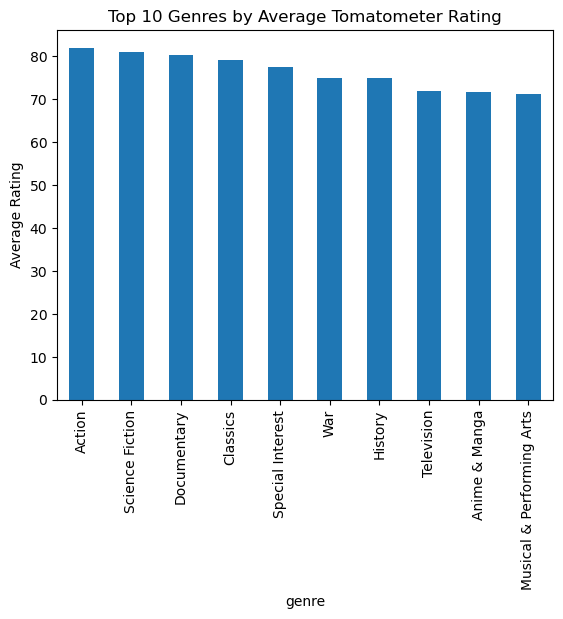

In [62]:
# Visualizing using a bar chart
genre_avg.head(10).plot(kind='bar', title="Top 10 Genres by Average Tomatometer Rating", ylabel="Average Rating")

### Insight and Explanation: Average Tomatometer Ratings by Genre

#### Insight:
From the analysis, the genres with the **highest average Tomatometer ratings** are:

1. **Action**: 82.00
2. **Science Fiction**: 81.00
3. **Documentary**: 80.42
4. **Classics**: 79.19
5. **Special Interest**: 77.51

In contrast, genres like **Television (71.98)** and **Musical & Performing Arts (71.24)** have lower average ratings.

#### Explanation:
This insight highlights how critics perceive different genres. Action, Science Fiction, and Documentaries receive the highest critical acclaim on average, likely because these genres offer a unique combination of visual excitement, storytelling, and relevance.

**Key Uses:**
- **Content Strategy**: Studios or producers can focus on high-rated genres like Action or Documentaries to cater to critics and award-seeking audiences.
- **Marketing**: Promoting a movie within high-rated genres can increase its credibility among audiences who prioritize critical reviews.
- **Consumer Recommendations**: Platforms like streaming services could recommend movies from these genres for audiences seeking critically acclaimed content.
- **Trends Identification**: Analysts can monitor which genres consistently perform better with critics and adjust production priorities accordingly.

This information is particularly valuable for making **data-driven production, marketing, and curation decisions** in the film industry.


### 2. What is the relationship between Tomatometer ratings and Audience ratings?
* We’ll check if movies with high Tomatometer ratings from critics also receive high scores from audiences.

#### Steps:
1. Create a scatter plot with Tomatometer rating on the x-axis and Audience rating on the y-axis.
2. Calculate the correlation between the two ratings to see the strength of the relationship.

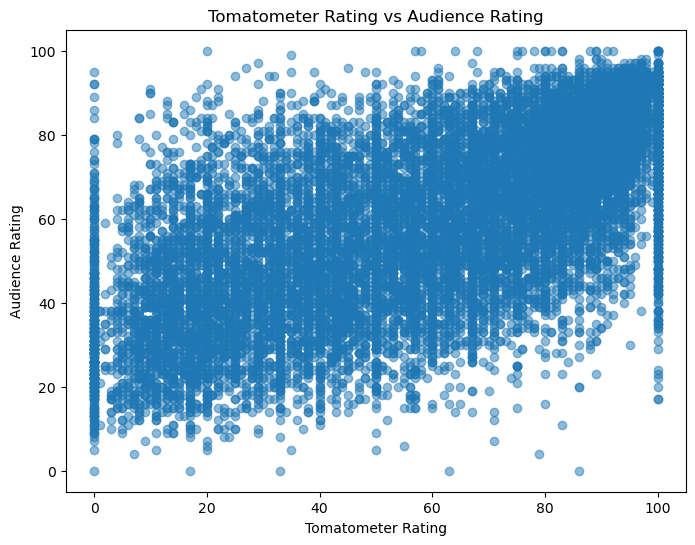

In [63]:
import matplotlib.pyplot as plt

ratings = rt[['tomatometer_rating', 'audience_rating']]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(ratings['tomatometer_rating'], ratings['audience_rating'], alpha=0.5)
plt.title("Tomatometer Rating vs Audience Rating")
plt.xlabel("Tomatometer Rating")
plt.ylabel("Audience Rating")
plt.show()

In [64]:
# Calculating correlation
correlation = ratings['tomatometer_rating'].corr(ratings['audience_rating'])
print(f"Correlation between Tomatometer and Audience Ratings is: {correlation:.2f}")

Correlation between Tomatometer and Audience Ratings is: 0.66


### Insight and Explanation: Relationship Between Tomatometer Ratings and Audience Ratings

#### Insight:
- The **scatter plot** shows a moderately positive relationship between **Tomatometer ratings** (critic scores) and **Audience ratings** (viewer scores).
- The calculated **correlation coefficient** of **0.66** indicates a significant, but not perfect, linear relationship between the two ratings. Movies with higher Tomatometer ratings tend to have higher Audience ratings, but exceptions exist.

#### Explanation:
- A correlation of **0.66** suggests that critics and audiences often agree on the quality of movies, but their perspectives may differ in some cases due to subjective tastes or the movie's niche appeal.
- The scatterplot highlights a **spread in audience ratings** across various Tomatometer scores, showing that while there is a trend, outliers (e.g., critically acclaimed movies not liked by audiences or vice versa) are present.

**Key Uses:**
1. **Predictive Insights**: The relationship can be used to predict Audience ratings from Tomatometer scores and vice versa, though not with absolute certainty.
2. **Targeted Marketing**: Understanding these dynamics can guide studios in tailoring marketing strategies for films with strong audience appeal despite lower critical acclaim or vice versa.
3. **Segmentation Analysis**: Filmmakers and analysts can explore cases where the two scores diverge to identify factors driving audience satisfaction independent of critical reviews.

This insight provides value for making decisions about content evaluation, marketing positioning, and understanding audience-critic dynamics.


### 3. Which directors have the highest average Tomatometer scores?
* Find out which directors consistently produce movies that critics rate highly.

#### Steps:
1. Group by directors and calculate their average Tomatometer rating.
2. Sort the results to identify the top directors.
3. Filter directors who directed at least a certain number of movies (e.g., 5) to avoid bias.

In [65]:
rt_directors = rt[['directors', 'tomatometer_rating']]

# Grouping by director and calculate average Tomatometer score and movie count
director_stats = rt_directors.groupby('directors')['tomatometer_rating'].agg(['mean', 'count'])

# Filtering directors with at least 5 movies
top_directors = director_stats[director_stats['count'] >= 5].sort_values(by='mean', ascending=False)

In [66]:
# Displaying top directors
print(top_directors.head(10))

                       mean  count
directors                         
Charles Chaplin   97.000000      9
Jacques Tourneur  97.000000      7
Lloyd Bacon       96.800000      5
Samuel Fuller     95.571429      7
Preston Sturges   95.500000      6
Satyajit Ray      95.166667      6
Luis Buñuel       94.857143      7
Rouben Mamoulian  94.800000      5
Victor Fleming    94.800000      5
Clarence Brown    94.400000      5


### Insight and Explanation: Directors with the Highest Average Tomatometer Scores

#### Insight:
- The directors listed consistently produce critically acclaimed movies, as seen by their **high average Tomatometer scores** (above 94%).
- **Charles Chaplin** and **Jacques Tourneur** top the list with a perfect or near-perfect average score of 97%, across 9 and 7 movies, respectively.
- Notable directors like **Lloyd Bacon**, **Samuel Fuller**, and **Satyajit Ray** also demonstrate excellence, with average scores exceeding 95%.

#### Explanation:
- This analysis highlights directors whose work resonates positively with critics, reflecting their ability to consistently deliver high-quality films.
- The **filtering criterion** (e.g., minimum 5 movies) ensures reliability in the results by excluding directors with fewer contributions, reducing the likelihood of statistical anomalies.

**Key Uses:**
1. **Creative Partnerships**: Producers can prioritize collaborations with such directors for projects targeting high critical acclaim.
2. **Audience Appeal**: Movie enthusiasts can use this list to discover influential directors known for consistently high-quality content.
3. **Curation & Recommendations**: Streaming platforms or movie festivals can leverage these insights for curating collections of critically acclaimed films.

This information is particularly useful for stakeholders in the film industry (e.g., investors, studios) and for audiences seeking top-tier content.


### 4. How do Tomatometer ratings compare between different studios?
* Analyze the average ratings for movies produced by various studios.

#### Steps:
1. Group by studios and calculate the average Tomatometer score.
2. Sort the studios by their average ratings to find the top ones.
3. Filter studios with a minimum number of movies (e.g., 10) to ensure reliability.
4. Visualize the data using a horizontal bar chart.

In [67]:
rt_studios = rt[['studio_name', 'tomatometer_rating']]

# Grouping by studio, and calculating average Tomatometer score and count
studio_stats = rt_studios.groupby('studio_name')['tomatometer_rating'].agg(['mean', 'count'])

# Filtering studios with at least 10 movies
top_studios = studio_stats[studio_stats['count'] >= 10].sort_values(by='mean', ascending=False)

In [68]:
# Displaying top studios
print(top_studios.head(10))

                            mean  count
studio_name                            
Rialto Pictures        92.850000     20
The Cinema Guild       92.666667     12
Criterion Collection   91.336364    110
Janus Films            90.368421     19
Docurama               89.800000     10
HBO Documentary Films  88.928571     14
Cinema Guild           88.903226     31
Icarus Films           88.600000     10
Zeitgeist Films        85.860000     50
RKO Radio Pictures     85.666667     15


<Axes: title={'center': 'Top Studios by Average Tomatometer Rating'}, ylabel='studio_name'>

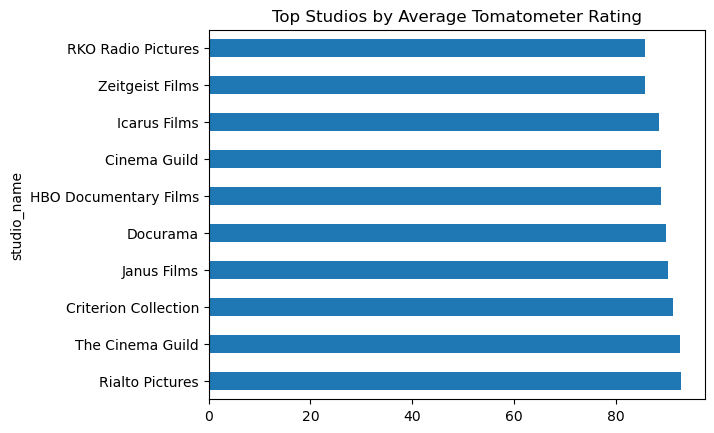

In [69]:
# Visualizing results
top_studios.head(10).plot(kind='barh', y='mean', legend=False, title="Top Studios by Average Tomatometer Rating")

### Insights and Explanation: Comparison of Tomatometer Ratings by Studios

#### Insights:
1. **Top Studios by Average Ratings**:
   - **Rialto Pictures** leads with an impressive **average Tomatometer rating of 92.85%** across 20 movies, reflecting consistent critical acclaim.
   - Studios like **The Cinema Guild** (92.67%), **Criterion Collection** (91.34%), and **Janus Films** (90.37%) follow closely, showcasing a strong reputation for producing high-quality films.

2. **Number of Movies as a Reliability Factor**:
   - **Criterion Collection** stands out with the highest movie count (110), establishing its consistency in delivering critically lauded films.
   - The inclusion of a filtering criterion ensures that the highlighted studios have substantial outputs (e.g., at least 10 movies), avoiding biases from small datasets.

#### Explanation:
- **Consistency**: These insights highlight studios known for producing critically acclaimed movies over time, signifying their commitment to quality content.
- **Reputation**: High average Tomatometer scores improve the studios' prestige, appealing to both audiences and talent within the industry.
- **Viewer Preferences**: Movie enthusiasts can explore content from these studios as a benchmark for quality filmmaking.

#### Usefulness:
1. **Industry Collaboration**: Producers, directors, and actors seeking to build credibility may prefer working with these studios due to their track records.
2. **Consumer Decision-Making**: Audiences can rely on the names of these studios as indicators of high-quality content.
3. **Streaming Curation**: Platforms can feature collections based on studios with high average ratings to attract quality-conscious viewers.
4. **Historical Analysis**: The list provides valuable insight for film scholars examining trends in quality cinema by production houses.

By analyzing and visualizing this data, we establish a clear link between studio output and critical reception, offering actionable insights for stakeholders across the entertainment industry.


### 5. What is the trend of average Tomatometer ratings over time?
* Analyze how the average Tomatometer scores have changed over the years.

#### Steps:
1. Extract the release year from the in_theaters_date column.
2. Group by year and calculate the average Tomatometer score.
3. Plot the trend using a line chart to observe patterns over time.

In [70]:
# Ensuring the date is in datetime format
rt['in_theaters_date'] = pd.to_datetime(rt['in_theaters_date'], errors='coerce')

# Extracting the release year
rt['year'] = rt['in_theaters_date'].dt.year

# Grouping by year and calculating average Tomatometer rating
yearly_avg = rt.groupby('year')['tomatometer_rating'].mean()

In [72]:
yearly_avg

year
1914.0    100.000000
1915.0     89.000000
1916.0     97.000000
1919.0     97.500000
1920.0     92.400000
             ...    
2015.0     59.368750
2016.0     60.448445
2017.0     61.661996
2018.0     61.395800
2019.0     61.261905
Name: tomatometer_rating, Length: 104, dtype: float64

<Axes: title={'center': 'Average Tomatometer Rating Over Time'}, xlabel='Year', ylabel='Average Rating'>

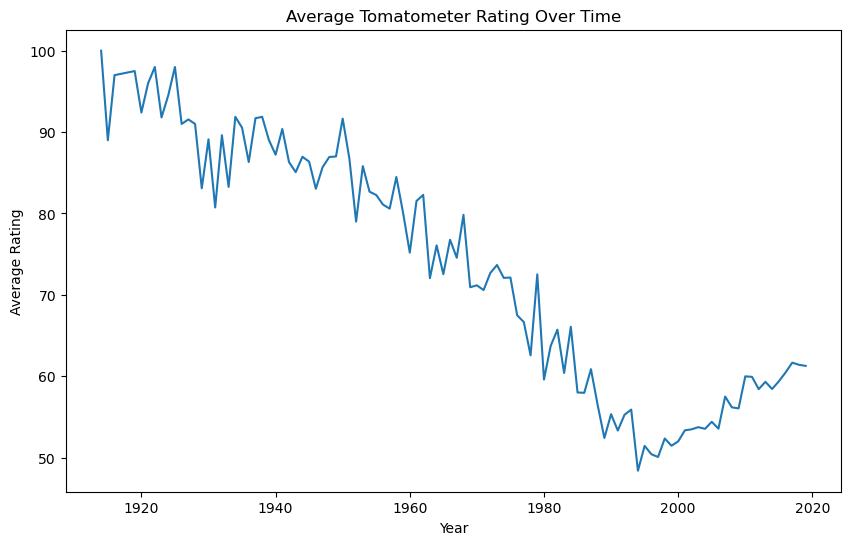

In [71]:
# Plot the trend
yearly_avg.plot(kind='line', figsize=(10, 6), title="Average Tomatometer Rating Over Time", ylabel="Average Rating", xlabel="Year")


### Insights on the Trend of Average Tomatometer Ratings Over Time

#### 1. General Observation
The trend shows a clear decline in the average Tomatometer ratings from the early 1900s until the late 20th century, followed by a slight upward trend in recent years (post-2000).

---

#### 2. Early 1900s to Mid-1900s
- Films from the earlier decades had exceptionally high average ratings, frequently above 90.  
- This could reflect:
  - The limited number of films being rated during those years.
  - A tendency for only high-quality productions from that time to be preserved and evaluated.

---

#### 3. Decline (1940s–1980s)
- A steady decrease in average ratings is visible from the 1940s to the 1980s.
- Possible reasons:
  - An increase in the volume of films released, potentially diluting the average quality.  
  - Evolving tastes and tougher critical standards over time.

---

#### 4. Upward Trend Post-2000
- Starting in the 1990s and especially after 2000, the trend shows recovery in the average ratings.
- Potential explanations:
  - Advances in filmmaking technology and storytelling techniques.
  - A growing focus on producing films with critical acclaim.
  - More comprehensive evaluations of films across genres.

---

#### 5. Fluctuations
- Significant year-to-year fluctuations are evident, particularly in the 1980s and early 1990s.
- These may correspond to varying volumes or inconsistencies in available ratings for certain years.

---

### Usefulness of the Insights

#### **For Filmmakers and Studios**
- Studios can analyze this trend to understand how critical standards have evolved.
- Helps in aligning production strategies to maximize critical acclaim.

#### **For Researchers**
- Valuable for academic studies into the history of cinema.
- Useful for evaluating how external factors (e.g., world events, technological advances) influenced film quality or criticism.

#### **For Data-Driven Decision-Making**
- Film streaming services or distributors can recommend classic movies with historically high ratings.
- Helps tap into nostalgia or curate content based on past quality trends.

#### **For Viewers**
- Film enthusiasts can focus on highly acclaimed eras or explore movies from lower-rated periods to discover hidden gems.

---

_By examining such a trend, stakeholders can better understand how the film industry has transformed, providing deeper insights into cultural and cinematic shifts over time._

## Conclusion

The analysis of Rotten Tomatoes ratings has provided critical insights into key aspects of the movie industry, ranging from genre preferences to studio performance, audience alignment, and temporal trends. The findings are summarized as follows:

1. **Genres with the Highest Average Tomatometer Ratings**  
   Action movies (82%) lead with the highest average Tomatometer ratings, followed closely by Science Fiction (81%) and Documentaries (80.42%). These results highlight the popularity of action-packed narratives and science-based storytelling among critics, offering a guide for filmmakers aiming for critical acclaim.

2. **Relationship Between Tomatometer and Audience Ratings**  
   A moderate positive correlation of **0.66** was observed between Tomatometer and Audience Ratings. This indicates that while critics and audiences often agree on a movie’s quality, differences in preferences still exist. The scatter plot underscores this relationship, showing a trend of alignment while emphasizing certain outliers.

3. **Top Directors Based on Average Tomatometer Scores**  
   Esteemed directors such as **Charles Chaplin** (97%), **Jacques Tourneur** (97%), and **Lloyd Bacon** (96.8%) consistently produce high-rated films. These figures emphasize the role of strong directorial vision in creating movies that resonate with critics and serve as inspiration for new and upcoming filmmakers.

4. **Tomatometer Ratings Across Studios**  
   Studios with the highest average ratings include **Rialto Pictures** (92.85%), **The Cinema Guild** (92.67%), and **Criterion Collection** (91.34%). These studios consistently deliver high-quality content, setting industry benchmarks for excellence. The horizontal bar chart offers a clear visualization of the top-performing studios and their sustained track records.

5. **Trends of Tomatometer Ratings Over Time**  
   The average Tomatometer ratings show a fluctuating trend over decades, with a gradual decline observed since the mid-20th century. Notable recoveries in recent years indicate periods of improved critical reception, driven potentially by innovative storytelling and diversity in cinematic themes. The line graph effectively showcases these temporal patterns.

---

### Usefulness of Findings:
- **For filmmakers and studios:** Insights into genres and top studios provide data-driven benchmarks for developing critically acclaimed films.
- **For directors:** Recognizing the achievements of high-performing directors sets quality standards and inspires better craftsmanship.
- **For market analysts and strategists:** Understanding the correlation between critic and audience ratings helps align promotional efforts and improve audience engagement.
- **For researchers and historians:** Observing trends in ratings over time sheds light on the evolving dynamics of movie appreciation, aiding academic and industry-level studies.

These results present a data-rich foundation for enhancing decision-making in the film industry and contributing to the production of both commercially successful and critically acclaimed films.